<a href="https://colab.research.google.com/github/Advait-08/Language-Detection/blob/main/Machine_Learning_Project(S3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import string
import re          
import io
import warnings
import time
from sklearn import feature_extraction
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
warnings.simplefilter("ignore")

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Language Detection.csv to Language Detection.csv


In [4]:
df1 = pd.read_csv(io.BytesIO(uploaded['Language Detection.csv']))

In [5]:
from google.colab import files
uploaded = files.upload()

Saving hindi.csv to hindi.csv


In [6]:
df2 = pd.read_csv(io.BytesIO(uploaded['hindi.csv']))

In [7]:
data=df1.append(df2,ignore_index=True)

In [8]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Hindi          781
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Name: Language, dtype: int64

In [9]:
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [10]:
def removeSymbolsAndNumbers(text):        
        text = re.sub(r'[{}]'.format(string.punctuation), '', text)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[@]', '', text)

        return text.lower()

In [11]:
def removeEnglishLetters(text):        
        text = re.sub(r'[a-zA-Z]+', '', text)
        return text.lower()

In [12]:
temp1 = data.apply(lambda x: removeEnglishLetters(x.Text) if x.Language in ['Russian','Malyalam','Hindi','Kannada','Tamil','Arabic']  else x.Text, axis = 1)

In [13]:
X=temp1.apply(removeSymbolsAndNumbers)

In [14]:
y=data['Language']

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [16]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3), analyzer='char')

Logistic Regression

In [17]:
lgstart_time=time.time()

In [18]:
lgmodel = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', LogisticRegression())
])

In [19]:
lgmodel.fit(x_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', LogisticRegression())])

In [20]:
lgend_time=time.time()

In [21]:
y_predlg = lgmodel.predict(x_test)
ac_lg = accuracy_score(y_test,y_predlg)

In [22]:
print("Accuracy for Logistic Regression:",ac_lg)
print("Execution time: ",(lgend_time-lgstart_time))

Accuracy for Logistic Regression: 0.9859791949344188
Execution time:  53.18115282058716


In [23]:
print(classification_report(y_test,y_predlg))

              precision    recall  f1-score   support

      Arabic       0.99      0.99      0.99       100
      Danish       0.97      0.98      0.97        86
       Dutch       0.99      0.99      0.99       120
     English       0.98      1.00      0.99       293
      French       0.98      0.98      0.98       198
      German       0.98      0.98      0.98        99
       Greek       1.00      1.00      1.00        66
       Hindi       1.00      0.99      1.00       139
     Italian       0.99      0.94      0.96       173
     Kannada       1.00      1.00      1.00        72
   Malayalam       1.00      0.99      1.00       114
  Portugeese       0.98      0.99      0.98       143
     Russian       1.00      1.00      1.00       136
     Spanish       0.98      0.97      0.98       151
    Sweedish       0.98      0.97      0.98       127
       Tamil       1.00      1.00      1.00        96
     Turkish       0.95      1.00      0.98        98

    accuracy              

In [26]:
cmlg = confusion_matrix(y_test, y_predlg)

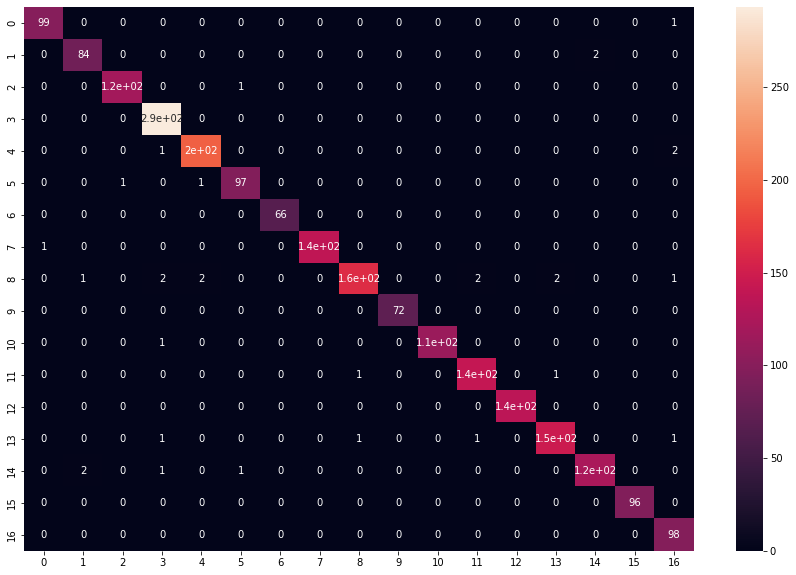

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(cmlg, annot = True)
plt.show()

Naive Bayes

In [28]:
nbstart_time=time.time()

In [29]:
nbmodel = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', MultinomialNB())
])

In [30]:
nbmodel.fit(x_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', MultinomialNB())])

In [31]:
nbend_time=time.time()

In [32]:
y_prednb = nbmodel.predict(x_test)
ac_nb = accuracy_score(y_test,y_prednb)

In [33]:
print("Accuracy for Naive Bayes:",ac_nb)
print("Execution time: ",(nbend_time-nbstart_time))

Accuracy for Naive Bayes: 0.8127544097693351
Execution time:  14.276071548461914


In [36]:
print(classification_report(y_test,y_prednb))

              precision    recall  f1-score   support

      Arabic       1.00      0.99      0.99       100
      Danish       1.00      0.14      0.24        86
       Dutch       1.00      0.35      0.52       120
     English       0.43      1.00      0.60       293
      French       0.96      0.97      0.96       198
      German       1.00      0.14      0.25        99
       Greek       1.00      1.00      1.00        66
       Hindi       1.00      1.00      1.00       139
     Italian       1.00      0.45      0.62       173
     Kannada       1.00      1.00      1.00        72
   Malayalam       1.00      0.99      1.00       114
  Portugeese       1.00      0.88      0.94       143
     Russian       1.00      1.00      1.00       136
     Spanish       0.96      0.90      0.93       151
    Sweedish       0.91      0.82      0.86       127
       Tamil       1.00      1.00      1.00        96
     Turkish       1.00      0.82      0.90        98

    accuracy              

In [37]:
cmnb = confusion_matrix(y_test, y_prednb)

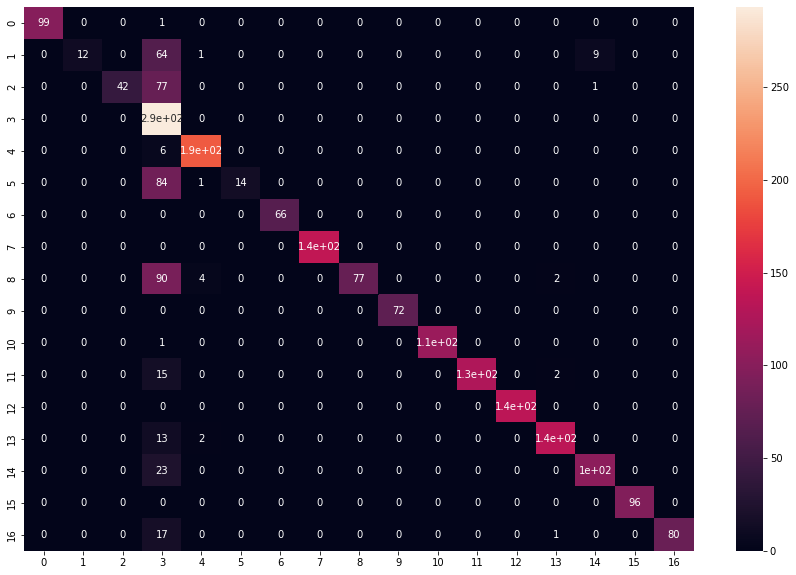

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(cmnb, annot = True)
plt.show()

In [34]:
def predictLG(text):
    lang = lgmodel.predict([text])
    print('The Language is in',lang[0])

In [35]:
def predictNB(text):
    lang = nbmodel.predict([text])
    print('The Language is in',lang[0])

Prediction using Logistic Regression

In [40]:
predictLG("HOW ARE YOU")

The Language is in English


In [41]:
predictLG("CÓMO ESTÁS")

The Language is in Spanish


In [42]:
predictLG("आप कैसे हैं")

The Language is in Hindi


In [43]:
predictLG("HOE IS HET MET U")

The Language is in Dutch


Prediction using Naive Bayes

In [44]:
predictNB("HOW ARE YOU")

The Language is in English


In [45]:
predictNB("CÓMO ESTÁS")

The Language is in Spanish


In [46]:
predictNB("आप कैसे हैं")

The Language is in Hindi


In [47]:
predictNB("HOE IS HET MET U")

The Language is in English


In [48]:
predictLG("SUT WYT TI")

The Language is in English


In [49]:
predictNB("SUT WYT TI")

The Language is in English
